# 0. Read XML and get measures to invert chords

### A. Parse tree

In [27]:
import xml.etree.cElementTree as ET

filename = "../../XMLs/至少還有你_主旋律.musicxml"
tree = ET.parse(filename)

In [28]:
root = tree.getroot()
root.tag, root.attrib

('score-partwise', {'version': '3.1'})

In [29]:
all_notes = root.findall('.//note')

### B. Read measures

In [30]:
from mxlParsing import *

xml_measures = root.findall('.//measure')
measures = []

for xml_measure in xml_measures:
    measure = Measure(get_meas_notes_xml(xml_measure))
    if not measure.get_sos()==['0']:
        measures.append(measure)

In [31]:
for measure in measures:
    measure.printMeasure()

Note: rest / half
Note: rest / quarter
Note: rest / eighth
Note: G4 / 16th / None
Note: G4 / 16th / None
Note: F4 / eighth / None
Note: A4 / 16th / None
Note: D5 / 16th / start
Note: D5 / half / stop
Note: D5 / eighth / stop
Note: A4 / 16th / None
Note: A4 / 16th / None
Note: D5 / eighth / None
Note: A4 / 16th / None
Note: B4 / 16th / start
Note: B4 / half / stop
Note: B4 / eighth / stop
Note: G4 / 16th / None
Note: G4 / 16th / None
Note: F4 / eighth / None
Note: A4 / eighth / None
Note: D5 / eighth / None
Note: E5 / 16th / None
Note: E5 / 16th / start
Note: E5 / 16th / stop
Note: D5 / eighth / None
Note: rest / eighth
Note: D5 / 16th / None
Note: E5 / 16th / None
Note: F5 / eighth / None
Note: C5 / 16th / None
Note: C5 / 16th / start
Note: C5 / eighth / stop
Note: B4 / eighth / None
Note: C5 / quarter / None
Note: A4 / 16th / None
Note: A4 / 16th / None
Note: B4 / eighth / None
Note: D5 / eighth / None
Note: D5 / eighth / None
Note: B4 / 16th / None
Note: E5 / 16th / start
Note: E5 / 

# 1. Explore Music21

In [32]:
from music21 import *
import copy


In [33]:
import copy

it = ['M-3','P1','A4']
it

['M-3', 'P1', 'A4']

In [34]:
p = pitch.Pitch('F4')
cList = []

for i in it:
    print(i)
    pNew = p.transpose(i, inPlace=False)
    cList.append(pNew)

cList

M-3
P1
A4


[<music21.pitch.Pitch D-4>, <music21.pitch.Pitch F4>, <music21.pitch.Pitch B4>]

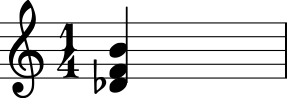

In [35]:
%matplotlib inline
import os

environment.set("musescoreDirectPNGPath", "/usr/bin/musescore")
chord1 = chord.Chord(cList)
chord1.show()

In [36]:
chord1.inversion(0)

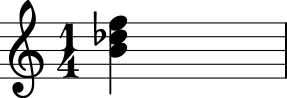

In [37]:
chord1.show()

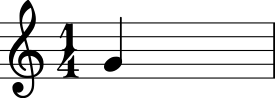

In [38]:
n = note.Note('G4')
n.show()
aInterval = interval.Interval(-6)

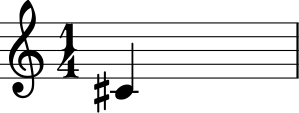

In [39]:
b = n.transpose(aInterval)
b.show()

# 2. Try Inversion 

In [40]:
it = measures[1].get_sos()
it

['F4', 'A4', 'D5', 'D5', 'D5', 'A4', 'A4']

In [41]:
it_types = measures[1].get_notetypes()
it_types

['eighth', '16th', '16th', 'half', 'eighth', '16th', '16th']

In [42]:
s1 = stream.Stream()
for n,t in zip(it,it_types):
    s1.append(note.Note(n,type=t))

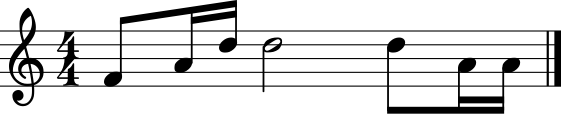

In [43]:
s1.show()

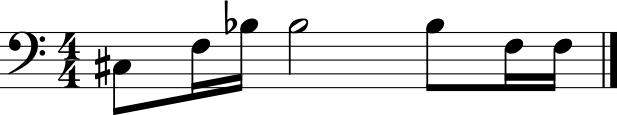

In [44]:
aInterval = interval.Interval(-16)
sinv = s1.transpose(aInterval)
sinv.show()

In [45]:
dir(s1)

['_DOC_ATTR',
 '_DOC_ORDER',
 '__add__',
 '__bool__',
 '__class__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_accumulatedSeconds',
 '_activeSite',
 '_activeSiteStoredOffset',
 '_atSoundingPitch',
 '_cache',
 '_classListFullyQualifiedCacheDict',
 '_classSetCacheDict',
 '_classTupleCacheDict',
 '_consolidateLayering',
 '_deepcopySubclassable',
 '_derivation',
 '_durSpanOverlap',
 '_duration',
 '_editorial',
 '_elements',
 '_endElements',
 '_findLayering',
 '_fixMeasureNumbers',
 '_getActiveSite',
 '_getAtSoundingPitch',
 '_getClef',
 '_getDerivation',
 '_

In [47]:
s1.keySignature

In [19]:
from music21 import *
midi.realtime.StreamPlayer(s1).play()`a

StreamPlayerException: StreamPlayer requires pygame.  Install first

In [ ]:
midi.realtime.StreamPlayer(sinv).play()

In [21]:
import pygame

ModuleNotFoundError: No module named 'pygame'